In [117]:
import pandas as pd
import numpy as np
from scipy.stats import norm
from scipy import stats
from scipy.stats import ttest_ind
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from siuba.dply.forcats import fct_lump, fct_reorder 

In [62]:
ks1 = pd.read_csv('ks-projects-201612.csv', engine='python')
ks2 = pd.read_csv('ks-projects-201801.csv', engine='python')

In [18]:
ks1.tail()

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16
323745,999976400,ChknTruk Nationwide Charity Drive 2014 (Canceled),Documentary,Film & Video,USD,2014-10-17 02:35:30,50000,2014-09-17 02:35:30,25,canceled,1,US,25,NaN,NaN,NaN,NaN
323746,999977640,The Tribe,Narrative Film,Film & Video,USD,2011-07-19 03:35:14,1500,2011-06-22 03:35:14,155,failed,5,US,155,NaN,NaN,NaN,NaN
323747,999986353,Walls of Remedy- New lesbian Romantic Comedy f...,Narrative Film,Film & Video,USD,2010-08-16 05:59:00,15000,2010-07-01 19:40:30,20,failed,1,US,20,NaN,NaN,NaN,NaN
323748,999987933,BioDefense Education Kit,Technology,Technology,USD,2016-02-13 02:00:00,15000,2016-01-13 18:13:53,200,failed,6,US,200,NaN,NaN,NaN,NaN
323749,999988282,Nou Renmen Ayiti! We Love Haiti!,Performance Art,Art,USD,2011-08-16 09:07:47,2000,2011-07-19 09:07:47,524,failed,17,US,524,NaN,NaN,NaN,NaN


In [19]:
ks2.tail()

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
378656,999976400,ChknTruk Nationwide Charity Drive 2014 (Canceled),Documentary,Film & Video,USD,2014-10-17,50000.0,2014-09-17 02:35:30,25.0,canceled,1,US,25.0,25.0,50000.0
378657,999977640,The Tribe,Narrative Film,Film & Video,USD,2011-07-19,1500.0,2011-06-22 03:35:14,155.0,failed,5,US,155.0,155.0,1500.0
378658,999986353,Walls of Remedy- New lesbian Romantic Comedy f...,Narrative Film,Film & Video,USD,2010-08-16,15000.0,2010-07-01 19:40:30,20.0,failed,1,US,20.0,20.0,15000.0
378659,999987933,BioDefense Education Kit,Technology,Technology,USD,2016-02-13,15000.0,2016-01-13 18:13:53,200.0,failed,6,US,200.0,200.0,15000.0
378660,999988282,Nou Renmen Ayiti! We Love Haiti!,Performance Art,Art,USD,2011-08-16,2000.0,2011-07-19 09:07:47,524.0,failed,17,US,524.0,524.0,2000.0


TypeError: 'tuple' object is not callable

In [22]:
ks1.shape

(323750, 17)

In [24]:
ks2.shape

(378661, 15)

In [104]:
ks3 = ks1.drop(columns= ['Unnamed: 13','Unnamed: 14', 'Unnamed: 15',  'Unnamed: 16'])

In [47]:
ks3.head()

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09 11:36:00,1000,2015-08-11 12:12:28,0,failed,0,GB,0
1,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26 00:20:50,45000,2013-01-12 00:20:50,220,failed,3,US,220
2,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16 04:24:11,5000,2012-03-17 03:24:11,1,failed,1,US,1
3,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29 01:00:00,19500,2015-07-04 08:35:03,1283,canceled,14,US,1283
4,1000014025,Monarch Espresso Bar,Restaurants,Food,USD,2016-04-01 13:38:27,50000,2016-02-26 13:38:27,52375,successful,224,US,52375


In [103]:
ks4 = ks2.drop(ks2.columns[[13, 14]], axis= 1)

In [74]:
ks4.head()

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,failed,0,GB,0.0
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,failed,15,US,100.0
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.0,failed,3,US,220.0
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.0,failed,1,US,1.0
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.0,2015-07-04 08:35:03,1283.0,canceled,14,US,1283.0


In [268]:

ks5 = pd.concat([ks3, ks4], axis= 0, join='outer', ignore_index=True, sort= False)
#ks5 = ks3.append(ks4, ignore_index=True)
#pieces = {'x': ks3, 'y': ks4}
#ks5 = pd.concat(pieces, axis= 0, ignore_index=True)

#ID_1 = ks3.iloc[:,0]
#ID_2 = ks4.iloc[:,0]
#ID_1.head()
ks5.head()

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,...,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged
0,1.000002e+09,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09 11:36:00,1000,2015-08-11 12:12:28,0,failed,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1.000004e+09,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26 00:20:50,45000,2013-01-12 00:20:50,220,failed,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1.000008e+09,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16 04:24:11,5000,2012-03-17 03:24:11,1,failed,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1.000011e+09,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29 01:00:00,19500,2015-07-04 08:35:03,1283,canceled,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1.000014e+09,Monarch Espresso Bar,Restaurants,Food,USD,2016-04-01 13:38:27,50000,2016-02-26 13:38:27,52375,successful,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


id = ID_1.append(ID_2, ignore_index=True)
id.shape

for column in range(13) : 
    a = ks3.iloc[:,column]
    b = ks4.iloc[:,column]
    ks3[column] = pd.concat([a, b], axis=0, ignore_index=True)

In [107]:
ks5.tail()

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,...,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged
702406,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Film & Video,USD,2014-10-17,50000.0,2014-09-17 02:35:30,25.0,canceled,1.0,US,25.0
702407,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Film & Video,USD,2011-07-19,1500.0,2011-06-22 03:35:14,155.0,failed,5.0,US,155.0
702408,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Film & Video,USD,2010-08-16,15000.0,2010-07-01 19:40:30,20.0,failed,1.0,US,20.0
702409,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Technology,USD,2016-02-13,15000.0,2016-01-13 18:13:53,200.0,failed,6.0,US,200.0
702410,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Art,USD,2011-08-16,2000.0,2011-07-19 09:07:47,524.0,failed,17.0,US,524.0


In [84]:
type(ks4)

pandas.core.frame.DataFrame

In [214]:
ks = pd.read_csv('ks_combo.csv')

C:\Users\burhan\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (6,8,10,12) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [215]:
ks.shape

(702411, 13)

In [216]:
ks.head()

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd.pledged
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000,2015-08-11 12:12:28,0,failed,0,GB,0
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000,2017-09-02 04:43:57,2421,failed,15,US,100
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000,2013-01-12 00:20:50,220,failed,3,US,220
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000,2012-03-17 03:24:11,1,failed,1,US,1
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500,2015-07-04 08:35:03,1283,canceled,14,US,1283


In [217]:
ks.tail()

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd.pledged
702406,999976400,ChknTruk Nationwide Charity Drive 2014 (Canceled),Documentary,Film & Video,USD,2014-10-17 02:35:30,50000,2014-09-17 02:35:30,25,canceled,1,US,25
702407,999977640,The Tribe,Narrative Film,Film & Video,USD,2011-07-19 03:35:14,1500,2011-06-22 03:35:14,155,failed,5,US,155
702408,999986353,Walls of Remedy- New lesbian Romantic Comedy f...,Narrative Film,Film & Video,USD,2010-08-16 05:59:00,15000,2010-07-01 19:40:30,20,failed,1,US,20
702409,999987933,BioDefense Education Kit,Technology,Technology,USD,2016-02-13 02:00:00,15000,2016-01-13 18:13:53,200,failed,6,US,200
702410,999988282,Nou Renmen Ayiti! We Love Haiti!,Performance Art,Art,USD,2011-08-16 09:07:47,2000,2011-07-19 09:07:47,524,failed,17,US,524


In [218]:
ks['state'].value_counts()

failed        365940
successful    247037
canceled       71133
live            7227
undefined       7117
               ...  
1421               1
8494               1
250                1
52670              1
11050              1
Name: state, Length: 410, dtype: int64

In [219]:
ks['main_category'].value_counts()

Film & Video               121264
Music                       98662
Publishing                  74107
Games                       63239
Technology                  58697
                            ...  
Flight                          1
People                          1
Cookbooks                       1
Pet Fashion                     1
 50 Years in the Making         1
Name: main_category, Length: 120, dtype: int64

In [220]:
fct_lump?

In [221]:
ks['main_category'] = fct_lump(ks['main_category'], n= 11)

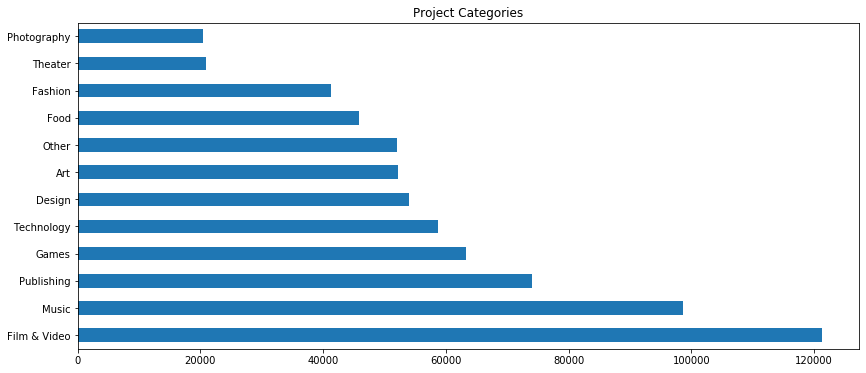

In [222]:
ks['main_category'].value_counts().plot(kind='barh', figsize=(14,6), title='Project Categories')

In [223]:
ks['currency'] = fct_lump(ks['currency'], n= 11)

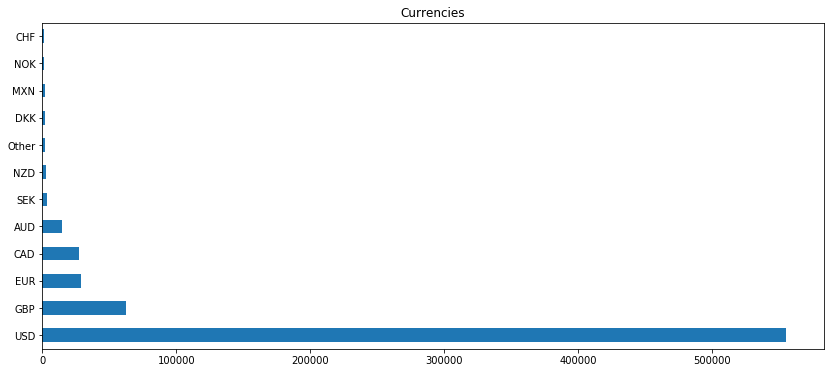

In [224]:
ks['currency'].value_counts().plot(kind='barh', figsize=(14,6), title='Currencies')

In [225]:
ks.head()

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd.pledged
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000,2015-08-11 12:12:28,0,failed,0,GB,0
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000,2017-09-02 04:43:57,2421,failed,15,US,100
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000,2013-01-12 00:20:50,220,failed,3,US,220
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000,2012-03-17 03:24:11,1,failed,1,US,1
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500,2015-07-04 08:35:03,1283,canceled,14,US,1283


In [236]:
ks['country'] = fct_lump(ks['country'], n= 9)

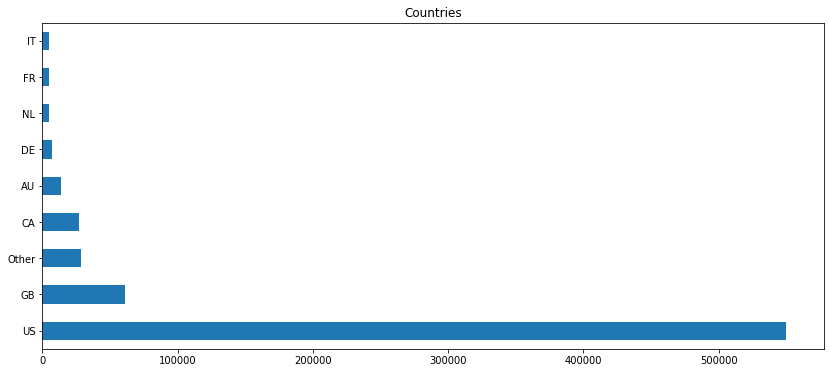

In [237]:
ks['country'].value_counts().plot(kind='barh', figsize=(14,6), title='Countries')

In [228]:
ks['country'].value_counts()

US       550192
GB        61181
CA        26748
Other     24959
AU        14075
DE         6855
NL         5127
FR         4849
IT         4628
N,0"       3797
Name: country, dtype: int64

In [229]:
ks.head()

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd.pledged
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000,2015-08-11 12:12:28,0,failed,0,GB,0
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000,2017-09-02 04:43:57,2421,failed,15,US,100
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000,2013-01-12 00:20:50,220,failed,3,US,220
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000,2012-03-17 03:24:11,1,failed,1,US,1
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500,2015-07-04 08:35:03,1283,canceled,14,US,1283


In [230]:
def state (series):
    if series == 'successful':
        return 'successful'
    else:
        return 'failed'

ks['state_lump'] = ks['state'].apply(state)

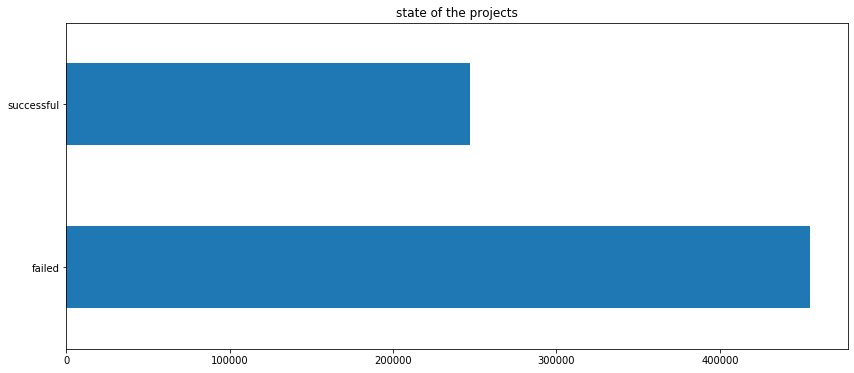

In [231]:
ks['state_lump'].value_counts().plot(kind='barh', figsize=(14,6), title='state of the projects')

In [232]:
from datetime import datetime
from datetime import timedelta

In [233]:
ks['launched'] = pd.to_datetime(ks['launched'], format='%Y-%m-%d %H:%M:%S', errors='coerce' )

In [248]:
ks['launched_year']=ks['launched'].dt.year
ks['launched_year'].dropna(inplace=True)
ks['launched_year'] = ks['launched_year'].astype(int)

In [249]:
ks.tail()

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd.pledged,state_lump,launched_year,launched_month,launched_day
702406,999976400,ChknTruk Nationwide Charity Drive 2014 (Canceled),Documentary,Film & Video,USD,2014-10-17 02:35:30,50000,2014-09-17 02:35:30,25,canceled,1,US,25,failed,2014.0,9.0,17.0
702407,999977640,The Tribe,Narrative Film,Film & Video,USD,2011-07-19 03:35:14,1500,2011-06-22 03:35:14,155,failed,5,US,155,failed,2011.0,6.0,22.0
702408,999986353,Walls of Remedy- New lesbian Romantic Comedy f...,Narrative Film,Film & Video,USD,2010-08-16 05:59:00,15000,2010-07-01 19:40:30,20,failed,1,US,20,failed,2010.0,7.0,1.0
702409,999987933,BioDefense Education Kit,Technology,Technology,USD,2016-02-13 02:00:00,15000,2016-01-13 18:13:53,200,failed,6,US,200,failed,2016.0,1.0,13.0
702410,999988282,Nou Renmen Ayiti! We Love Haiti!,Performance Art,Art,USD,2011-08-16 09:07:47,2000,2011-07-19 09:07:47,524,failed,17,US,524,failed,2011.0,7.0,19.0


In [244]:
ks['launched_month']=ks['launched'].dt.month

In [240]:
ks['launched_day']=ks['launched'].dt.day

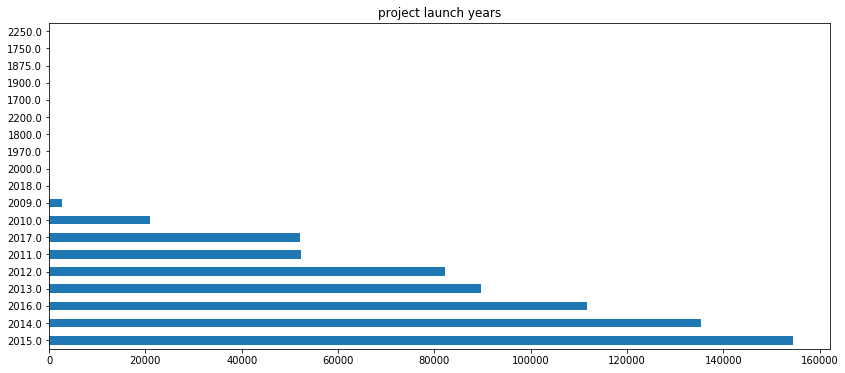

In [250]:
ks['launched_year'].value_counts().plot(kind='barh', figsize=(14,6), title='project launch years')

In [265]:
# visualize the date between years 2009-2017
a = ks[(ks['launched_year'] < 2018) & (ks['launched_year'] > 2007)]
a.head()

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd.pledged,state_lump,launched_year,launched_month,launched_day
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000,2015-08-11 12:12:28,0,failed,0,GB,0,failed,2015.0,8.0,11.0
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000,2017-09-02 04:43:57,2421,failed,15,US,100,failed,2017.0,9.0,2.0
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000,2013-01-12 00:20:50,220,failed,3,US,220,failed,2013.0,1.0,12.0
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000,2012-03-17 03:24:11,1,failed,1,US,1,failed,2012.0,3.0,17.0
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500,2015-07-04 08:35:03,1283,canceled,14,US,1283,failed,2015.0,7.0,4.0


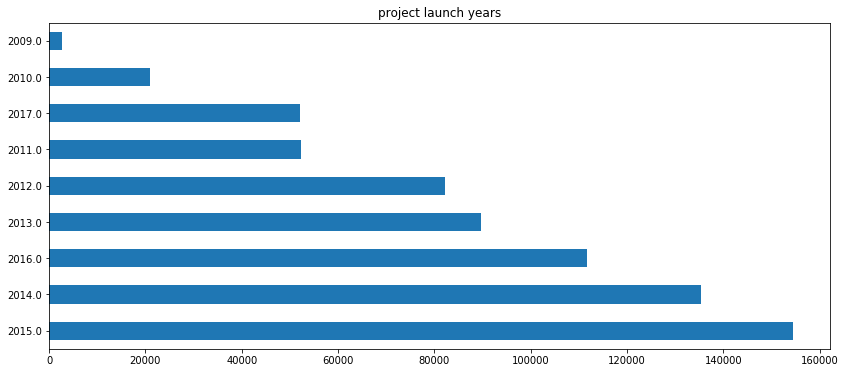

In [266]:
a['launched_year'].value_counts().plot(kind='barh', figsize=(14,6), title='project launch years')

In [269]:
ks.head()

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd.pledged,state_lump,launched_year,launched_month,launched_day
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000,2015-08-11 12:12:28,0,failed,0,GB,0,failed,2015.0,8.0,11.0
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000,2017-09-02 04:43:57,2421,failed,15,US,100,failed,2017.0,9.0,2.0
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000,2013-01-12 00:20:50,220,failed,3,US,220,failed,2013.0,1.0,12.0
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000,2012-03-17 03:24:11,1,failed,1,US,1,failed,2012.0,3.0,17.0
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500,2015-07-04 08:35:03,1283,canceled,14,US,1283,failed,2015.0,7.0,4.0


In [272]:
ks['main_category'].value_counts()

Film & Video    121264
Music            98662
Publishing       74107
Games            63239
Technology       58697
Design           53942
Art              52128
Other            51983
Food             45831
Fashion          41214
Theater          20885
Photography      20459
Name: main_category, dtype: int64

In [273]:
ks['category'].value_counts()

Product Design                                        39791
Documentary                                           31030
Music                                                 29634
Tabletop Games                                        24888
Shorts                                                24038
                                                      ...  
 Project 2.8 - The OTHER 1%                               1
 Santa Fe streamcaster of local & regional content        1
 CTRL XC                                                  1
 A Hip-Hop Infused Videogame                              1
 The Fourth Horseman                                      1
Name: category, Length: 771, dtype: int64